<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Machine-Learning-and-Deep-Learning-Projects/blob/main/Cat%20recognizer%20%5Bdeep%20learning%20approach%20by%20using%20logistic%20regresion%5D/cat_recognizer_(deep_learning_approach_using_logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cat recognizer using deep learning [ Logistic Regression Using Multiple Hidden Layer ]**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py                # for interacting with a dataset that is stored on an H5 file

In [ ]:
def load_data():

  train_dataset = h5py.File('train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)

where, 

* m_train (number of training examples)
* m_test (number of test examples)
* num_px (height, width of a training image)

In [ ]:
print(f"Train Set[Features] Shape: {train_x_orig.shape}")
print(f"Test Set[Features] Shape: {test_x_orig.shape}")
print(f"Train Set[Labels] Shape: {train_y.shape}")
print(f"Test Set[Labels] Shape: {test_y.shape}")
print(f"Number of training examples: {train_x_orig.shape[0]}")
print(f"Number of testing examples: {test_y.shape[0]}")
print(f"Height/Width of each image: {train_x_orig.shape[1]}")
print(f"Each image is of size: ({train_x_orig.shape[1]}, {train_x_orig.shape[2]}, {train_x_orig.shape[3]})")

Train Set[Features] Shape: (209, 64, 64, 3)
Test Set[Features] Shape: (50, 64, 64, 3)
Train Set[Labels] Shape: (1, 209)
Test Set[Labels] Shape: (1, 50)
Number of training examples: 209
Number of testing examples: 1
Height/Width of each image: 64
Each image is of size: (64, 64, 3)


Each line of train_set_x_orig and test_set_x_orig is an array representing an image. One can visualize an example by running the following code by changing the value of 'index'

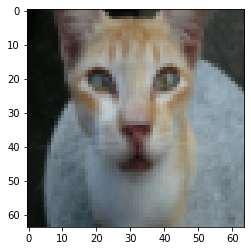

In [ ]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
plt.show()

**Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1).**

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T 
        
*X.T is the transpose of X*

In [ ]:
# Reshape the training and test examples
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0], -1).T


print(f"Train Set[Features] shape: {(train_x_flatten.shape)}")
print(f"Train Set[Labels] shape: {(train_y.shape)}")
print(f"Test Set[Features] shape: {(test_x_flatten.shape)}")
print(f"Test Set[Labels] shape: {(test_y.shape)}")

Train Set[Features] shape: (12288, 209)
Train Set[Labels] shape: (1, 209)
Test Set[Features] shape: (12288, 50)
Test Set[Labels] shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize  dataset, meaning that substracting the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [ ]:
# Standardize the Datasets
train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

In [ ]:
# Defining some helper functions

# sigmoid function
def sigmoid(Z):
  
  A = 1/(1+np.exp(-Z))
  cache = Z
    
  return A, cache


# relu function
def relu(Z):

  A = np.maximum(0,Z) 
  cache = Z 
 
  return A, cache


# relu function for back propagation
def relu_backward(dA, cache):
   
  Z = cache
  dZ = np.array(dA, copy=True)        # just converting dz to a correct object.
  # When z <= 0, we should set dz to 0 as well. 
  dZ[Z <= 0] = 0
    
  return dZ


# sigmoid function for back propagation
def sigmoid_backward(dA, cache):

  Z = cache
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)
    
  return dZ

Creating and initializing the parameters for a 2 layered neural network.

In [ ]:
# initialize parameters for two layers

def initialize_parameters(n_x, n_h, n_y):
  
  W1 = np.random.randn(n_h,n_x)*0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h)*0.01
  b2 = np.zeros((n_y,1))
    
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
  return parameters    

Creating and initializing the parameters for a L layered neural network.
- we will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims`  [2,4,1] means there are two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now we will generalize this to $L$ layers!

In [ ]:
# initialize parameters for L layers

def initialize_parameters_deep(layer_dims):
  
  parameters = {}
  L = len(layer_dims)       # number of layers in the network

  for l in range(1, L):
    
    parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])/ np.sqrt(layer_dims[l-1])   #   *0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
  return parameters

Building the linear part of forward propagation.

In [ ]:
#  linear part of forward propagation

def linear_forward(A, W, b):
    
  Z = np.dot(W,A) + b 
  cache = (A, W, b)
    
  return Z, cache

Building the linear activation function for linear forward propagation

In [ ]:
# linear activation for forward propagation

def linear_activation_forward(A_prev, W, b, activation):
     
  if activation == "sigmoid":
    Z, linear_cache = linear_forward(A_prev, W, b)   # This "linear_cache" contains (A_prev, W, b)
    A, activation_cache = sigmoid(Z)                 # This "activation_cache" contains "Z"
        
  elif activation == "relu":
    Z, linear_cache = linear_forward(A_prev, W, b)    # This "linear_cache" contains (A_prev, W, b)
    A, activation_cache = relu(Z)                     # This "activation_cache" contains "Z"
        
  cache = (linear_cache, activation_cache)

  return A, cache

Implementing the forward propagation of the L layered model.

In [ ]:
# L layered model forward

def L_model_forward(X, parameters):
   
  caches = []
  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
    
  # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
  # The for loop starts at 1 because layer 0 is the input
  for l in range(1, L):
    A_prev = A 
    A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
    caches.append(cache)
        
  # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
  AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
  caches.append(cache)
    
  return AL, caches

Implementing the cost function

In [ ]:
# computing cost

def compute_cost(AL, Y):
   
  m = Y.shape[1]
  # Compute loss from aL and y.
  cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    
  cost = np.squeeze(cost)      # To make sure cost's shape is what we expect (e.g. this turns [[17]] into 17).

  return cost

Implementing linear backward propagation


In [ ]:
#  linear backward propagation

def linear_backward(dZ, cache):
    
  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1/m) * np.dot(dZ, A_prev.T)
  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T,dZ)
  
  return dA_prev, dW, db

Implementing the backward propagation for the Linear Activation layer.

In [ ]:
# linear activation backward

def linear_activation_backward(dA, cache, activation):
    
  linear_cache, activation_cache = cache
    
  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

  elif activation == "sigmoid": 
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
  return dA_prev, dW, db

Implementing the backward function for the whole network

In [ ]:
# L layered model backward

def L_model_backward(AL, Y, caches):
   
  grads = {}
  L = len(caches)                     # the number of layers
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)             # after this line, Y is the same shape as AL
    
  # Initializing the backpropagation
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
 
  # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
  current_cache = caches[L-1] # Last Layer
  dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
  grads["dA" + str(L-1)] = dA_prev_temp
  grads["dW" + str(L)] = dW_temp
  grads["db" + str(L)] =  db_temp
    
  # Loop from l=L-2 to l=0
  for l in reversed(range(L-1)):
    # lth layer: (RELU -> LINEAR) gradients.
    # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 

    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
    grads["dA" + str(l)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp
 
  return grads

Updating parameters using gradient descent

In [ ]:
# updating parameters

def update_parameters(params, grads, learning_rate):
    
  parameters = params.copy()
  L = len(parameters) // 2              # number of layers in the neural network

  # Update rule for each parameter. Using a for loop.
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
   
  return parameters

In [ ]:
# prediction

def predict(X, y, parameters):

  m = X.shape[1]
  n = len(parameters) // 2      # number of layers in the neural network
  p = np.zeros((1,m))
    
  # Forward propagation
  probas, caches = L_model_forward(X, parameters)
  
  # converting probas to 0/1 predictions
  for i in range(0, probas.shape[1]):
    if probas[0,i] > 0.5:
      p[0,i] = 1
    else:
      p[0,i] = 0
    
  #print results
  #print ("predictions: " + str(p))
  #print ("true labels: " + str(y))
  print(f"Accuracy is : {round(100*(np.sum((p == y)/m)), ndigits=2)} %")
        
  return p

Final 2 layered model

In [ ]:
# defining the constants

n_x = 12288    
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [ ]:
# 2 layered model

def two_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):
   
  grads = {}
  costs = []                               # to keep track of the cost
  m = X.shape[1]                           # number of examples
  (n_x, n_h, n_y) = layers_dims
    
  # initializing parameters dictionary
  parameters = initialize_parameters(n_x, n_h, n_y)
      
  # getting W1, b1, W2 and b2 from the dictionary parameters.
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
    
  # loop (gradient descent)
  for i in range(0, num_iterations):

    A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
    # computing cost
    cost = compute_cost(A2, Y)
        
    # initializing backward propagation
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
    # backward propagation
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
    # setting grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2
        
    # updating parameters
    parameters = update_parameters(parameters, grads, learning_rate)

    # retrieving W1, b1, W2, b2 from parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Printing the cost every 100 iterations
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
      print(f"Cost after iteration {i}: {np.squeeze(cost)}")
    if i % 100 == 0 or i == num_iterations:
      costs.append(cost)

  return parameters, costs

def plot_costs(costs, learning_rate):
  plt.plot(np.squeeze(costs))
  plt.ylabel("cost")
  plt.xlabel("iterations (per hundreds)")
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

Training the model

In [ ]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.0075, num_iterations = 2500, print_cost=True)


Cost after iteration 0: 0.6950227869499688
Cost after iteration 100: 0.6461404817760741
Cost after iteration 200: 0.6327095141206671
Cost after iteration 300: 0.6037476683755487
Cost after iteration 400: 0.5645558719194408
Cost after iteration 500: 0.5196973601316633
Cost after iteration 600: 0.4641571463979747
Cost after iteration 700: 0.40622861249150904
Cost after iteration 800: 0.4041585687234438
Cost after iteration 900: 0.3712835709635514
Cost after iteration 1000: 0.3327845391379971
Cost after iteration 1100: 0.30873127955868324
Cost after iteration 1200: 0.2660322516976252
Cost after iteration 1300: 0.22517024252231635
Cost after iteration 1400: 0.1591171129274329
Cost after iteration 1500: 0.1304835059028286
Cost after iteration 1600: 0.1224826407035477
Cost after iteration 1700: 0.09880739975511191
Cost after iteration 1800: 0.08377646982075555
Cost after iteration 1900: 0.07528520179147943
Cost after iteration 2000: 0.06267221583555388
Cost after iteration 2100: 0.0543981144

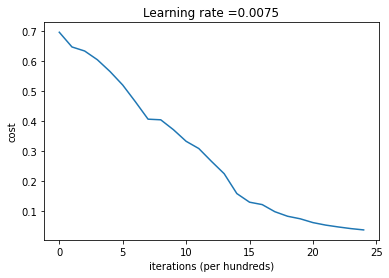

In [ ]:
plot_costs(costs, learning_rate = 0.0075)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy is : 100.0 %


In [ ]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy is : 68.0 %


Final L layered model

In [ ]:
# defining the constants
layers_dims = [12288, 20, 7, 5, 1]        #  4 layered model

print(len(layers_dims))

5


In [ ]:
# L layer model

def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):
   
  costs = []                         # keep track of cost
    
  # Parameters initialization.
  parameters = initialize_parameters_deep(layers_dims)
        
  # Loop (gradient descent)
  for i in range(0, num_iterations):

    # Forward propagation: 
    AL, caches = L_model_forward(X, parameters)
         
    # Compute cost.
    cost = compute_cost(AL, Y)
    
    # Backward propagation. 
    grads = L_model_backward(AL, Y, caches)
 
    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)
        
    # Print the cost every 100 iterations
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
      print(f"Cost after iteration {i}: {np.squeeze(cost)}")
    if i % 100 == 0 or i == num_iterations:
      costs.append(cost)
    
  return parameters, costs

Training the model

In [ ]:
# training the model
parameters, costs = L_layer_model(train_x, train_y, layers_dims,learning_rate = 0.0075, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6955154408898924
Cost after iteration 100: 0.6281758974267465
Cost after iteration 200: 0.587375668065058
Cost after iteration 300: 0.5301484619481512
Cost after iteration 400: 0.45250008216782034
Cost after iteration 500: 0.38367801803484125
Cost after iteration 600: 0.32284502194195536
Cost after iteration 700: 0.2765818178306489
Cost after iteration 800: 0.21030211275971525
Cost after iteration 900: 0.12746249407605803
Cost after iteration 1000: 0.1908904223937338
Cost after iteration 1100: 0.04829661923713242
Cost after iteration 1200: 0.032806350180274196
Cost after iteration 1300: 0.024090019530306785
Cost after iteration 1400: 0.01861993794642625
Cost after iteration 1500: 0.014815180903994881
Cost after iteration 1600: 0.012134230253724001
Cost after iteration 1700: 0.010174374236167077
Cost after iteration 1800: 0.008688301502409738
Cost after iteration 1900: 0.007546214239306414
Cost after iteration 2000: 0.006620612494796732
Cost after iteration 210

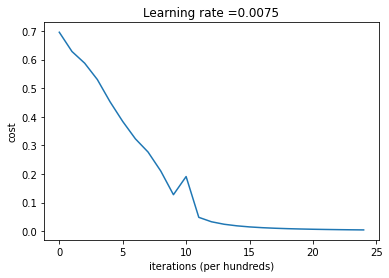

In [ ]:
plot_costs(costs, learning_rate = 0.0075)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy is : 100.0 %


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy is : 78.0 %
